# Estadísticos, estimadores y parámetros.

Un estadístico es una medida usada para describir alguna característica de
una muestra (media, mediana, desviación típica,...) y un parámetro es una
medida usada para describir las mismas características pero de la población
(media, mediana, desviación típica,...). Cuando el estadístico se calcula en
una muestra con idea de hacer inferencia sobre la misma característica en
la población, se le llama estimador. La inferencia estadística pretende
aproximarse a los parámetros de la población a partir de los estimadores de
la muestra. Para distinguir los estimadores (valores muestrales) de los
parámetros (valores poblacionales) los representaremos a partir de ahora
con diferentes símbolos:

![](https://raw.githubusercontent.com/robintux/Images4Colabs/master/EstadisticosMuestraPoblacion.png)


## Variación entre muestras.
Si tomamos varias muestras aleatorias de cierta población, cualquier
estimador tomará valores distintos para cada una de ellas. A esta variación
en las estimaciones, efecto del azar sobre la elección de la muestra, se le
llama variación muestral. La variación muestral dependerá de la
variabilidad de la variable que tengamos y también del tamaño de la
muestra.

### Ejemplos de variación entre muestras
Si tomamos distintas muestras de la temperatura corporal en población
sana tendremos una variación muestral bastante baja (la variabilidad de
esta variable es baja entre diferentes personas).
Si tomamos la tensión arterial en la población española obtendremos una
variación muestral bastante más elevada.
(Variabilidad de esta variable alta).
Si tomamos muestras de tamaño 10 y calculamos medias muestrales, por
ejemplo, se parecerán entre ellas menos, que si las muestras que tomamos
son de tamaño 1000. Es decir la variación muestral sería en general más
baja cuanto más grande sea la muestra utilizada para calcular nuestro
estimador.

## Distribución de estadísticos en el muestreo.
### Error estándar de la media muestral
El Teorema Central del Límite nos asegura que si nuestra muestra es
razonablemente grande la distribución de la media muestral de cualquier
variable sigue una distribución Normal y que además, la desviación típica de
esta media tiene como expresión:

$$ \dfrac{\sigma}{\sqrt{n}}$$

que representa la desviación típica de la variable original y n es el tamaño
de la muestra. A la expresión anterior se le llama error estándar de la
media.

Supongamos que tenemos una variable cuantitativa cualquiera X, cuya
media en la población es $\mu$ y cuya desviación típica (también en la
población) es $\sigma$. Si se toman varias muestras de tamaño suficientemente
grande y llamamos X a la variable que guarda las medias muestrales para
cada una de las muestras, por el Teorema Central del Límite tenemos
asegurado:

$$ \bar{X} \sim N\left( \mu, \dfrac{\sigma}{\sqrt{n}}\right) $$

### Error estándar de un porcentaje
En el caso de que la variable de interés sea una variable nominal no tiene
sentido que nos planteemos el error estándar de su media (de hecho la
media de una variable nominal no tiene tampoco sentido) sino el de su
porcentaje de individuos en cada uno de sus valores. En este caso si P es el
porcentaje de respuestas en ese valor su error estándar será:

$$\sqrt{ \dfrac{P(100-P)}{n}}$$

En la expresión anterior se ha supuesto que la variable P está expresada en
tantos por 100, si estuviera expresada en tantos por uno (es decir P es un
valor entre 0 y 1) únicamente habríamos de cambiar en ella el valor 100 por
1 y la expresión seguiría siendo válida.
Supongamos que tenemos una variable categórica y que nos interesa
estimar el porcentaje de una de sus categorías en la población, al que
llamamos P. Si tomamos varias muestras de tamaño suficientemente
grande (n) y en cada una de esas muestras obtenemos una estimación del
porcentaje de interés, si llamamos b P a la variable que guarda los
porcentajes de esas muestras, se cumple que esta variable aleatoria sigue
la siguiente distribución:

$$ \widehat{P} \sim N\left( P, \sqrt{\dfrac{P(100-P)}{n}}\right)$$

## Intervalos de confianza
El proceso de inferencia es aquel mediante el cual se pretende estimar el
valor de un parámetro a partir del valor de un estadístico. Esta estimación
puede ser puntual o bien por intervalo. La mejor estimación puntual de
un parámetro es simplemente el valor del estadístico correspondiente, pero
es poco informativa porque la probabilidad de no dar con el valor correcto
es muy elevada, es por eso que se acostumbra a dar una estimación por
intervalo, en el que se espera encontrar el valor del parámetro con una
elevada probabilidad. Esta estimación recibe el nombre de estimación
mediante intervalos de confianza.

La estimación por intervalos de confianza consiste en determinar un
posible rango de valores o intervalo (a; b), en el que, con una determinada
probabilidad, sus límites contendrán el valor del parámetro poblacional que
andamos buscando. Para cada muestra obtendremos un intervalo distinto
que, para el X % de ellas, contendrá el verdadero valor del parámetro. A
este intervalo se le denomina intervalo de confianza.

Evidentemente esta técnica no tiene porqué dar siempre un resultado
correcto, tal y como hemos comentado para algunas muestras el intervalo
correspondiente contendrá el verdadero valor del parámetro y para otras
no. A la probabilidad de que hayamos acertado al decir que el intervalo
contiene al parámetro se la denomina nivel de confianza (o simplemente
confianza). También se denomina nivel de significación a la probabilidad
de errar en esta afirmación, es decir la significación (probabilidad de errar con nuestro intervalo) será igual a 1-(nivel de confianza), ya que el nivel de
confianza corresponde a la probabilidad de que el intervalo contenga el valor
verdadero del parámetro.

Para que los ingresen en la ciencia de datos, es realmente importante comprender los conceptos de estadística y probabilidad. ¡Uno de esos conceptos es el intervalo de confianza! 

Es una idea frecuentista (estadísticos que ven la probabilidad como la frecuencia). Si [a, b] es un intervalo de confianza del 95% para la media de la muestra, es decir, el 95% del tiempo, los intervalos de confianza contendrían la media de la muestra.

En este notebook, veremos los intervalos de confianza y cómo puede verificarlos usando la biblioteca NumPy de Python.



In [1]:
import pandas as pd 
import numpy as np 

np.random.seed(666)

cafe = pd.read_csv('https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/coffee_dataset.csv')

cafe_muestra = cafe.sample(n = 200)

cafe_muestra.head()


,user_id,age,drinks_coffee,height
2819,3076,<21,True,65.356024
1205,3219,>=21,True,70.192550
2626,5517,<21,False,63.171236
1528,6029,>=21,True,68.346182
657,2893,<21,False,65.517730


Entonces, nuestra muestra es "cafe_muestra" y estaremos trabajando en eso. Revisemos la cantidad de usuarios que toman café y quienes no.


In [3]:

cafe_muestra.groupby('drinks_coffee').count()['user_id']

drinks_coffee
False     81
True     119
Name: user_id, dtype: int64

In [6]:
cafe_muestra.query('drinks_coffee == True').mean()['height']

68.57060469023921

In [ ]:
cafe_muestra.query('drinks_coffee == True').mean()['height']

68.57060469023921

Después de eso, decidí tomar una muestra [bootstrap](https://economipedia.com/definiciones/bootstrap.html) de 200 filas. Si se da cuenta, le he agregado un parámetro "replace = True". Significa que las filas se pueden repetir en la muestra.


In [ ]:
bootstrap_muestra = cafe_muestra.sample(n= 200, replace=True)
bootstrap_muestra.query("drinks_coffee==True").mean()['height']

68.27771129188804

In [ ]:
bootstrap_muestra.query("drinks_coffee==False").mean()['height']

66.3091827273981

Se observa que la media calculada en cafe_muestra y bootstrap_muestra son diferentes. Solo por el parámetro "replace = True".

Ahora, usemos bootstrapping para crear muestras 10,000 veces. Y agregue la media de cada muestra en la lista, es decir, bootstrap. Y crea un histograma después de eso.



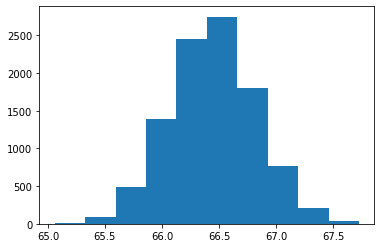

In [ ]:
bootstrap = []
for i in range(10000):
  bootstrap_muestra = cafe.sample(n=200, replace = True)
  bootstrap.append(bootstrap_muestra.query('drinks_coffee==False').mean()['height'])
  # print(bootstrap)

# Grafiquemos el histograma
import matplotlib.pyplot as plt
plt.hist(bootstrap)
plt.show()


Vayamos ahora a la parte esencial. A partir de ahora, ya hemos creado una distribución de un estadístico, es decir, la media. Pero, cómo construir un intervalo de confianza.


In [ ]:
np.percentile(bootstrap, 2.5),  np.percentile(bootstrap, 97.5)

(65.7188799914218, 67.18968551580505)

He tomado el percentil 2.5 y 97.5 de los datos del bootstrap. Tenemos valores de 65,99 y 67,58, es decir, tenemos un 95% de probabilidad de que nuestro parámetro se encuentre entre estos dos números.

En conclusion : El intervalo de confianza nos permite estimar el parámetro de la población utilizando datos de muestra.

Los intervalos de confianza son aplicables durante las pruebas A/B cuando comparamos dos grupos. Si una empresa está buscando una nueva página web, puede compararla con la página anterior que tenía y realizar una prueba. Además, pueden ver qué página genera más tráfico. ¡Y toma una decisión más!

Referencia:

  * [What is the use of confidence interval?
](https://www.quora.com/What-is-the-use-of-confidence-interval)

